# Exploratory Data Analysis

###### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
## Credentials of our spotify 'app' KIBRAM
CLIENT_ID = 'd32d970f8a764cdab2105e8b30ea57a5'
CLIENT_SECRET = 'b79d137c445342b985da989370f8febc'

In [3]:
manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = manager)

### Data collection

Note that the spotify database is in the variable `sp`. We directly implement some pre-processing steps, like verifying for and getting rid of data containing `None` values, 

In [4]:
## Unfortunately, Spotify only allows fetching data for a maximum of 50 tracks at once
#### ALBUMS
al_name = []
al_type = []
al_id = []
al_img = [] 

al_artists = []
al_artist_ids = []
al_URI = []
al_realease = []

for i in range(0,1000,50):
    raw_albums = sp.search(q = 'year:2023', type = 'album', limit = 50,offset = i)
    for i, album in enumerate(raw_albums['albums']['items']):
        if album is not None:
            al_name.append(album['name'])
            al_type.append(album['album_type'])
            al_id.append(album['id'])
            al_img.append(album['images'][0]['url'])

            art_name = [album['artists'][j]['name'] for j in range(len(album['artists']))]
            art_id = [album['artists'][j]['id'] for j in range(len(album['artists']))]
            al_artists.append(art_name)
            al_artist_ids.append(art_id)        

            al_URI.append(album['uri'])
            al_realease.append(album['release_date'])

In [5]:
#### ARTISTS
ar_name = []
ar_followers = []
ar_genres = []
ar_id = []
ar_img = []
ar_popularity = []
ar_URI = []

for i in range(0,650,50):
    raw_artists = sp.search(q = 'year:2023', type = 'artist', limit = 50,offset = i)
    for i, artist in enumerate(raw_artists['artists']['items']):
        if artist is not None:
            ar_name.append(artist['name'])
            ar_followers.append(artist['followers']['total'])

            genre = "None" if len(artist['genres']) == 0 else artist['genres'][0]
            ar_genres.append(genre)

            ar_id.append(artist['id'])
            ar_popularity.append(artist['popularity'])
            ar_URI.append(artist['uri'])

            img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
            ar_img.append(img_url)

In [6]:
#### TRACKS
tr_name = []
tr_id = []

tr_popularity = []
tr_URI = []

tr_art_id = []
tr_art_name = []
tr_art_img = []

tr_alb_id = []
tr_alb_name = []
tr_alb_img = []



for i in range(0,1000,50):
    raw_tracks = sp.search(q = 'year:2023', type = 'track', limit = 50,offset = i)
    for i, track in enumerate(raw_tracks['tracks']['items']):
        
        tr_name.append(track['name'])
        tr_id.append(track['id'])
        tr_popularity.append(track['popularity'])
        tr_URI.append(track['uri'])
        
        
        art_name = [track['artists'][j]['name'] for j in range(len(track['artists']))]
        art_id = [track['artists'][j]['id'] for j in range(len(track['artists']))]
        img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
        tr_art_img.append(img_url)
        tr_art_name.append(art_name)
        tr_art_id.append(art_id)
        
        img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
        tr_alb_img.append(img_url)
        tr_alb_name.append(track['album']['name'])
        tr_alb_id.append(track['album']['id'])    

##### Spotify audio features

1. Confidence measures

    - Acousticness: A measure from 0.0 to 1.0 that detects acoustic sounds in a track.

    - Liveness: A measure from 0.0 to 1.0 that detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

    - Speechiness: A measure from 0.0 to 1.0 that detects the presence of spoken words in a track. The more speech sounds are heard in the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the value will be.

    - Instrumentalness A measure from 0.0 to 1 that reflects the extent to which a track does not contain vocalizations. The closer the instrumentalness value is to 1.0, the greater the likelihood that the track does not contain vocal content.

2. Cerceptual measures

    - Energy: A measure from 0.0 to 1.0 that reflects the intensity of a track. Energetic tracks are usually fast, loud, and noisy.

    - Loudness: A measure from -60 and 0 that represents the overall loudness of a track. This value is measured in decibels (dB). Loudness values are averaged across the entire track.

    - Danceability: A measure from 0.0 to 1 that indicates how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength. A value closer to 0.0 indicates that a track is less danceable, and value closer to 1.0 is indicates that a track is more danceable.

    - Valence: A measure from 0.0 to 1.0 that reflects the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

3. Music descriptors

    - Tempo: The overall estimated speed of a track measured in beats per minute (BPM).

    - Duration: The duration of a track measured in milliseconds.

    - Key: A measure from 0 to 11 that indicates the key of a track.

    - Mode: A measure that indicates the key in the music of the track (1 is major, and 0 is for minor).

In [7]:
#### AUDIO FEATURES
acousticness = []
danceability = []
duration = []
energy = []
instrumentalness = []
key = []
liveness = []
loudness = []
modality = []
speechiness = []
tempo = []
valence = [] # positiveness of a track
id_withfeatures = []


for track_id in tr_id:
    audio_info = sp.audio_features(track_id)[0]
    if audio_info is not None:
        acousticness.append(audio_info['acousticness'])
        danceability.append(audio_info['danceability'])
        duration.append(audio_info['duration_ms'])
        energy.append(audio_info['energy'])
        instrumentalness.append(audio_info['instrumentalness'])
        key.append(audio_info['key'])
        liveness.append(audio_info['liveness'])
        loudness.append(audio_info['loudness'])
        modality.append(audio_info['mode'])
        speechiness.append(audio_info['speechiness'])
        tempo.append(audio_info['tempo'])
        valence.append(audio_info['valence'])
        id_withfeatures.append(track_id)    

### Data exploration and cleaning

In [8]:
df_artist = pd.DataFrame({'id' : ar_id, 'name': ar_name, 'followers' : ar_followers, 'genres' : ar_genres, 
                          'popularity' : ar_popularity, 'URI' : ar_URI, 'image URL' : ar_img})
df_artist.dropna(inplace = True)

df_album = pd.DataFrame({'id' : al_id, 'name': al_name, 'type' : al_type, 'artists' : al_artists, 
                          'artists ids' : al_artist_ids, 'URI' : al_URI, 
                         'release date' : al_realease, 'image URL' : al_img})
df_album.dropna(inplace = True)

df_track = pd.DataFrame({'id' : tr_id, 'name': tr_name, 'popularity' : tr_popularity, 'URI' : tr_URI, 
                         'artist id' : tr_art_id, 'artist name' : tr_art_name,'artist image URL' : tr_art_img,
                        'album id' : tr_alb_id, 'album name' : tr_alb_name})
df_track.dropna(inplace = True)

df_audiofeat = pd.DataFrame({'id' : id_withfeatures, 'acousticness' : acousticness, 'danceability' : danceability, 
                             'duration' : duration, 'energy' : energy, 'instrumentalness' : instrumentalness,
                            'key' : key, 'liveness' : liveness, 'loudness' : loudness, 'modality' : modality,
                            'speechiness' : speechiness, 'tempo' : tempo,'valence' : valence})
df_audiofeat.dropna(inplace = True)


In [9]:
df_artist.head()

id           name  followers                genres  \
0  06HL4z0CvFAxyc27GXpf02   Taylor Swift   75809975                   pop   
1  3TVXtAsR1Inumwj472S9r4          Drake   75774616      canadian hip hop   
2  4oUHIQIBe0LHzYfvXNW4QM  Morgan Wallen    6032360  contemporary country   
3  4q3ewBCX7sLwd24euuV69X      Bad Bunny   69878520             reggaeton   
4  5K4W6rqBFWDnAN6FQUkS6x     Kanye West   20219125           chicago rap   

   popularity                                    URI  \
0         100  spotify:artist:06HL4z0CvFAxyc27GXpf02   
1          95  spotify:artist:3TVXtAsR1Inumwj472S9r4   
2          90  spotify:artist:4oUHIQIBe0LHzYfvXNW4QM   
3          97  spotify:artist:4q3ewBCX7sLwd24euuV69X   
4          90  spotify:artist:5K4W6rqBFWDnAN6FQUkS6x   

                                           image URL  
0  https://i.scdn.co/image/ab6761610000e5eb5a0096...  
1  https://i.scdn.co/image/ab6761610000e5eb429338...  
2  https://i.scdn.co/image/ab6761610000e5eb0266f7...  
3  https://i.scdn.co/image/ab6761610000e5ebe63fa6...  
4  https://i.scdn.co/image/ab6761610000e5eb867008...

In [10]:
df_album.head()

id                              name   type  \
0  6i7mF7whyRJuLJ4ogbH2wh               One Thing At A Time  album   
1  6ciIG1XKTlVIn0Yl8rvsce                     Almost Healed  album   
2  1fnJ7k0bllNfL1kVdNVW1A  Midnights (The Til Dawn Edition)  album   
3  4kS7bSuU0Jm9LYMosFU2x5                MAÑANA SERÁ BONITO  album   
4  19O46pvAPG1Xg6fxAuSU5F  Midnights (The Til Dawn Edition)  album   

           artists               artists ids  \
0  [Morgan Wallen]  [4oUHIQIBe0LHzYfvXNW4QM]   
1       [Lil Durk]  [3hcs9uc56yIGFCSy9leWe7]   
2   [Taylor Swift]  [06HL4z0CvFAxyc27GXpf02]   
3        [KAROL G]  [790FomKkXshlbRYZFtlgla]   
4   [Taylor Swift]  [06HL4z0CvFAxyc27GXpf02]   

                                    URI release date  \
0  spotify:album:6i7mF7whyRJuLJ4ogbH2wh   2023-03-03   
1  spotify:album:6ciIG1XKTlVIn0Yl8rvsce   2023-05-26   
2  spotify:album:1fnJ7k0bllNfL1kVdNVW1A   2023-05-26   
3  spotify:album:4kS7bSuU0Jm9LYMosFU2x5   2023-02-24   
4  spotify:album:19O46pvAPG1Xg6fxAuSU5F   2023-05-26   

                                           image URL  
0  https://i.scdn.co/image/ab67616d0000b273705079...  
1  https://i.scdn.co/image/ab67616d0000b2736234c2...  
2  https://i.scdn.co/image/ab67616d0000b273fa7476...  
3  https://i.scdn.co/image/ab67616d0000b27382de1c...  
4  https://i.scdn.co/image/ab67616d0000b273092cee...

In [11]:
df_track.head()

id                name  popularity  \
0  3dnP0JxCgygwQH9Gm7q7nb     Ella Baila Sola          99   
1  6pD0ufEQq0xdHSsRbg9LBK           un x100to         100   
2  6AQbmUe0Qwf5PZnt4HmTXv  Boy's a Liar Pt. 2          95   
3  2UW7JaomAMuX9pZrjVpHAU     La Bebe - Remix          99   
4  7FbrGaHYVDmfr7KoLIZnQ7   Cupid - Twin Ver.          98   

                                    URI  \
0  spotify:track:3dnP0JxCgygwQH9Gm7q7nb   
1  spotify:track:6pD0ufEQq0xdHSsRbg9LBK   
2  spotify:track:6AQbmUe0Qwf5PZnt4HmTXv   
3  spotify:track:2UW7JaomAMuX9pZrjVpHAU   
4  spotify:track:7FbrGaHYVDmfr7KoLIZnQ7   

                                          artist id  \
0  [0XeEobZplHxzM9QzFQWLiR, 12GqGscKJx3aE4t07u7eVZ]   
1  [6XkjpgcEsYab502Vr1bBeW, 4q3ewBCX7sLwd24euuV69X]   
2  [78rUTD7y6Cy67W1RVzYs7t, 3LZZPxNDGDFVSIPqf4JuEf]   
3  [1NNRWkhwmcXRimFYSBpB1y, 12GqGscKJx3aE4t07u7eVZ]   
4                          [4GJ6xDCF5jaUqD6avOuQT6]   

                    artist name  \
0  [Eslabon Armado, Peso Pluma]   
1   [Grupo Frontera, Bad Bunny]   
2   [PinkPantheress, Ice Spice]   
3       [Yng Lvcas, Peso Pluma]   
4                 [FIFTY FIFTY]   

                                    artist image URL                album id  \
0  https://i.scdn.co/image/ab6761610000e5eb9b97b0...  3Mm1P5CEEAiuJqBclr2EyU   
1  https://i.scdn.co/image/ab6761610000e5eb9b97b0...  7aGzSSUD8S6IhPCsZSiuMT   
2  https://i.scdn.co/image/ab6761610000e5eb9b97b0...  6cVfHBcp3AdpYY0bBglkLN   
3  https://i.scdn.co/image/ab6761610000e5eb9b97b0...  6aBVGuOUEuX18rHxyDWbti   
4  https://i.scdn.co/image/ab6761610000e5eb9b97b0...  5letLUZIFsQikJYShfGNs4   

             album name  
0       Ella Baila Sola  
1             un x100to  
2    Boy's a liar Pt. 2  
3       La Bebe (Remix)  
4  The Beginning: Cupid

In [12]:
'''
We decided to focus on the top 200 tracks and artists based on popularity score, 
whereas we kept in our albums dataframe only the albums in which the artists (or artist) appear
in the top 200 artists, or as the artists of the top 200 tracks
''' 

df_artist.sort_values(by=['popularity'], ascending = False, inplace = True)
df_track.sort_values(by=['popularity'], ascending = False, inplace = True)

df_art = df_artist.head(200)
df_tra = df_track.head(500)

In [13]:
df_art.head()

id           name  followers                genres  \
0   06HL4z0CvFAxyc27GXpf02   Taylor Swift   75809975                   pop   
3   4q3ewBCX7sLwd24euuV69X      Bad Bunny   69878520             reggaeton   
1   3TVXtAsR1Inumwj472S9r4          Drake   75774616      canadian hip hop   
32  2LRoIwlKmHjgvigdNGBHNo           Feid    5520332         colombian pop   
2   4oUHIQIBe0LHzYfvXNW4QM  Morgan Wallen    6032360  contemporary country   

    popularity                                    URI  \
0          100  spotify:artist:06HL4z0CvFAxyc27GXpf02   
3           97  spotify:artist:4q3ewBCX7sLwd24euuV69X   
1           95  spotify:artist:3TVXtAsR1Inumwj472S9r4   
32          92  spotify:artist:2LRoIwlKmHjgvigdNGBHNo   
2           90  spotify:artist:4oUHIQIBe0LHzYfvXNW4QM   

                                            image URL  
0   https://i.scdn.co/image/ab6761610000e5eb5a0096...  
3   https://i.scdn.co/image/ab6761610000e5ebe63fa6...  
1   https://i.scdn.co/image/ab6761610000e5eb429338...  
32  https://i.scdn.co/image/ab6761610000e5eb731031...  
2   https://i.scdn.co/image/ab6761610000e5eb0266f7...

In [14]:
df_tra.head()

id               name  popularity  \
1   6pD0ufEQq0xdHSsRbg9LBK          un x100to         100   
0   3dnP0JxCgygwQH9Gm7q7nb    Ella Baila Sola          99   
3   2UW7JaomAMuX9pZrjVpHAU    La Bebe - Remix          99   
4   7FbrGaHYVDmfr7KoLIZnQ7  Cupid - Twin Ver.          98   
12  1odExI7RdWc4BT515LTAwj           Daylight          97   

                                     URI  \
1   spotify:track:6pD0ufEQq0xdHSsRbg9LBK   
0   spotify:track:3dnP0JxCgygwQH9Gm7q7nb   
3   spotify:track:2UW7JaomAMuX9pZrjVpHAU   
4   spotify:track:7FbrGaHYVDmfr7KoLIZnQ7   
12  spotify:track:1odExI7RdWc4BT515LTAwj   

                                           artist id  \
1   [6XkjpgcEsYab502Vr1bBeW, 4q3ewBCX7sLwd24euuV69X]   
0   [0XeEobZplHxzM9QzFQWLiR, 12GqGscKJx3aE4t07u7eVZ]   
3   [1NNRWkhwmcXRimFYSBpB1y, 12GqGscKJx3aE4t07u7eVZ]   
4                           [4GJ6xDCF5jaUqD6avOuQT6]   
12                          [33NVpKoXjItPwUJTMZIOiY]   

                     artist name  \
1    [Grupo Frontera, Bad Bunny]   
0   [Eslabon Armado, Peso Pluma]   
3        [Yng Lvcas, Peso Pluma]   
4                  [FIFTY FIFTY]   
12               [David Kushner]   

                                     artist image URL                album id  \
1   https://i.scdn.co/image/ab6761610000e5eb9b97b0...  7aGzSSUD8S6IhPCsZSiuMT   
0   https://i.scdn.co/image/ab6761610000e5eb9b97b0...  3Mm1P5CEEAiuJqBclr2EyU   
3   https://i.scdn.co/image/ab6761610000e5eb9b97b0...  6aBVGuOUEuX18rHxyDWbti   
4   https://i.scdn.co/image/ab6761610000e5eb9b97b0...  5letLUZIFsQikJYShfGNs4   
12  https://i.scdn.co/image/ab6761610000e5eb9b97b0...  6NcI39WPu4kY6Tul11nhSv   

              album name  
1              un x100to  
0        Ella Baila Sola  
3        La Bebe (Remix)  
4   The Beginning: Cupid  
12              Daylight

In [15]:
top200_artists_names = list(df_art['name'])
top500_track_artists_names = sum(list(df_tra['artist name']), [])
top_artists = list(set(top200_artists_names + top500_track_artists_names))

df_alb = df_album.copy()
for i in range(len(df_album)):
    artists = df_album.iloc[i]['artists']
    if any(artist in top_artists for artist in artists):
        df_alb.drop(index = i) 
        

In [16]:
df_alb.head()

id                              name   type  \
0  6i7mF7whyRJuLJ4ogbH2wh               One Thing At A Time  album   
1  6ciIG1XKTlVIn0Yl8rvsce                     Almost Healed  album   
2  1fnJ7k0bllNfL1kVdNVW1A  Midnights (The Til Dawn Edition)  album   
3  4kS7bSuU0Jm9LYMosFU2x5                MAÑANA SERÁ BONITO  album   
4  19O46pvAPG1Xg6fxAuSU5F  Midnights (The Til Dawn Edition)  album   

           artists               artists ids  \
0  [Morgan Wallen]  [4oUHIQIBe0LHzYfvXNW4QM]   
1       [Lil Durk]  [3hcs9uc56yIGFCSy9leWe7]   
2   [Taylor Swift]  [06HL4z0CvFAxyc27GXpf02]   
3        [KAROL G]  [790FomKkXshlbRYZFtlgla]   
4   [Taylor Swift]  [06HL4z0CvFAxyc27GXpf02]   

                                    URI release date  \
0  spotify:album:6i7mF7whyRJuLJ4ogbH2wh   2023-03-03   
1  spotify:album:6ciIG1XKTlVIn0Yl8rvsce   2023-05-26   
2  spotify:album:1fnJ7k0bllNfL1kVdNVW1A   2023-05-26   
3  spotify:album:4kS7bSuU0Jm9LYMosFU2x5   2023-02-24   
4  spotify:album:19O46pvAPG1Xg6fxAuSU5F   2023-05-26   

                                           image URL  
0  https://i.scdn.co/image/ab67616d0000b273705079...  
1  https://i.scdn.co/image/ab67616d0000b2736234c2...  
2  https://i.scdn.co/image/ab67616d0000b273fa7476...  
3  https://i.scdn.co/image/ab67616d0000b27382de1c...  
4  https://i.scdn.co/image/ab67616d0000b273092cee...

### Pre-analysis

In [17]:
df_art.head()

id           name  followers                genres  \
0   06HL4z0CvFAxyc27GXpf02   Taylor Swift   75809975                   pop   
3   4q3ewBCX7sLwd24euuV69X      Bad Bunny   69878520             reggaeton   
1   3TVXtAsR1Inumwj472S9r4          Drake   75774616      canadian hip hop   
32  2LRoIwlKmHjgvigdNGBHNo           Feid    5520332         colombian pop   
2   4oUHIQIBe0LHzYfvXNW4QM  Morgan Wallen    6032360  contemporary country   

    popularity                                    URI  \
0          100  spotify:artist:06HL4z0CvFAxyc27GXpf02   
3           97  spotify:artist:4q3ewBCX7sLwd24euuV69X   
1           95  spotify:artist:3TVXtAsR1Inumwj472S9r4   
32          92  spotify:artist:2LRoIwlKmHjgvigdNGBHNo   
2           90  spotify:artist:4oUHIQIBe0LHzYfvXNW4QM   

                                            image URL  
0   https://i.scdn.co/image/ab6761610000e5eb5a0096...  
3   https://i.scdn.co/image/ab6761610000e5ebe63fa6...  
1   https://i.scdn.co/image/ab6761610000e5eb429338...  
32  https://i.scdn.co/image/ab6761610000e5eb731031...  
2   https://i.scdn.co/image/ab6761610000e5eb0266f7...

<AxesSubplot:xlabel='genres'>

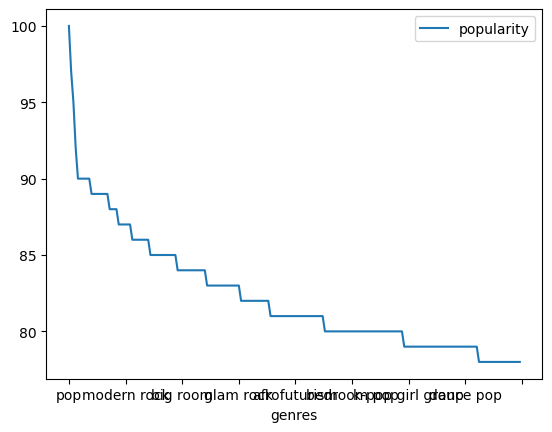

In [18]:
df_art.plot(x='genres', y = 'popularity')

genres
afrobeats              AxesSubplot(0.125,0.11;0.775x0.77)
afrofuturism           AxesSubplot(0.125,0.11;0.775x0.77)
album rock             AxesSubplot(0.125,0.11;0.775x0.77)
alt z                  AxesSubplot(0.125,0.11;0.775x0.77)
alternative hip hop    AxesSubplot(0.125,0.11;0.775x0.77)
                                      ...                
rap canario            AxesSubplot(0.125,0.11;0.775x0.77)
reggaeton              AxesSubplot(0.125,0.11;0.775x0.77)
reggaeton flow         AxesSubplot(0.125,0.11;0.775x0.77)
rock-and-roll          AxesSubplot(0.125,0.11;0.775x0.77)
trap boricua           AxesSubplot(0.125,0.11;0.775x0.77)
Name: popularity, Length: 93, dtype: object

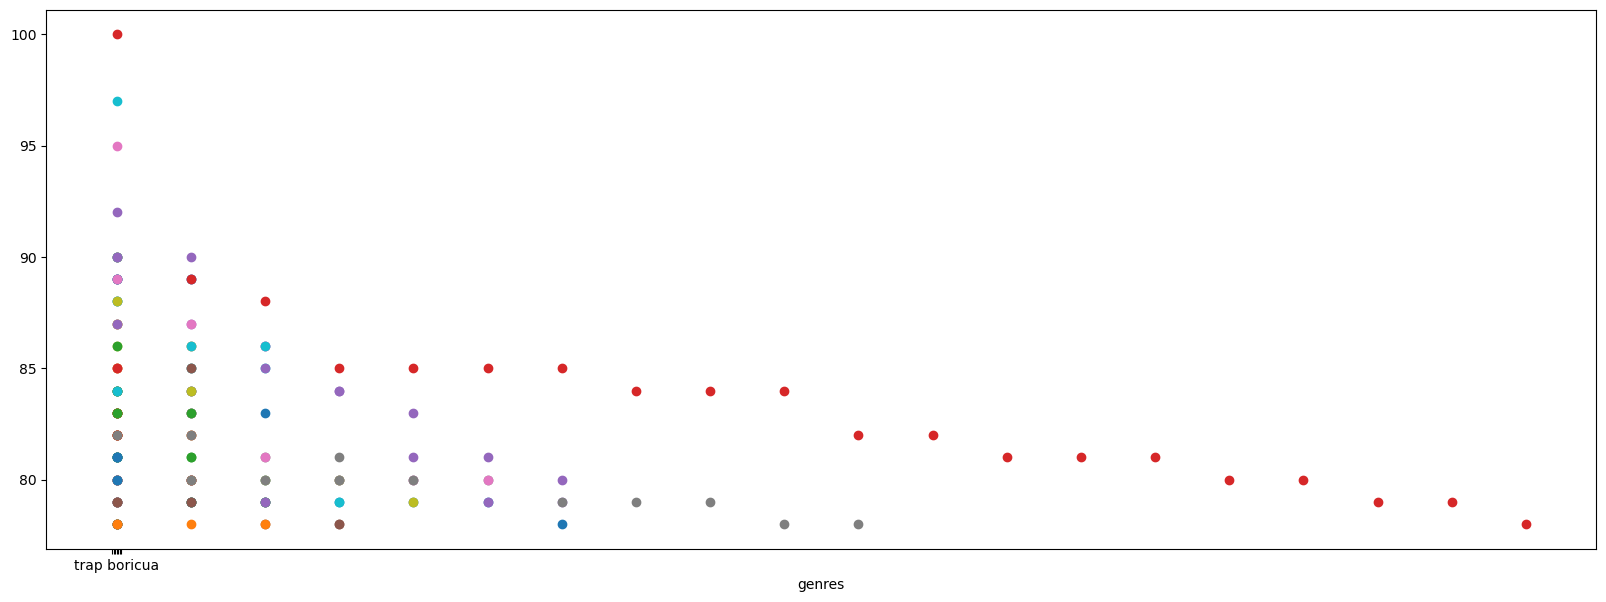

In [19]:
df_art_cleaned = df_art[df_art['genres'] != 'None']

df_art_cleaned.set_index('genres', inplace=True)
df_art_cleaned.groupby('genres')['popularity'].plot(style = 'o', figsize = (20,7))

In [20]:
df_genres = df_art.groupby(['genres'])['genres'].count()
df_genres.sort_values(ascending = False, inplace = True)
df_genres.head(10)

genres
pop                  20
dance pop            11
atl hip hop           7
colombian pop         7
k-pop                 7
hip hop               6
r&b                   5
latin hip hop         5
alternative metal     4
banda                 4
Name: genres, dtype: int64

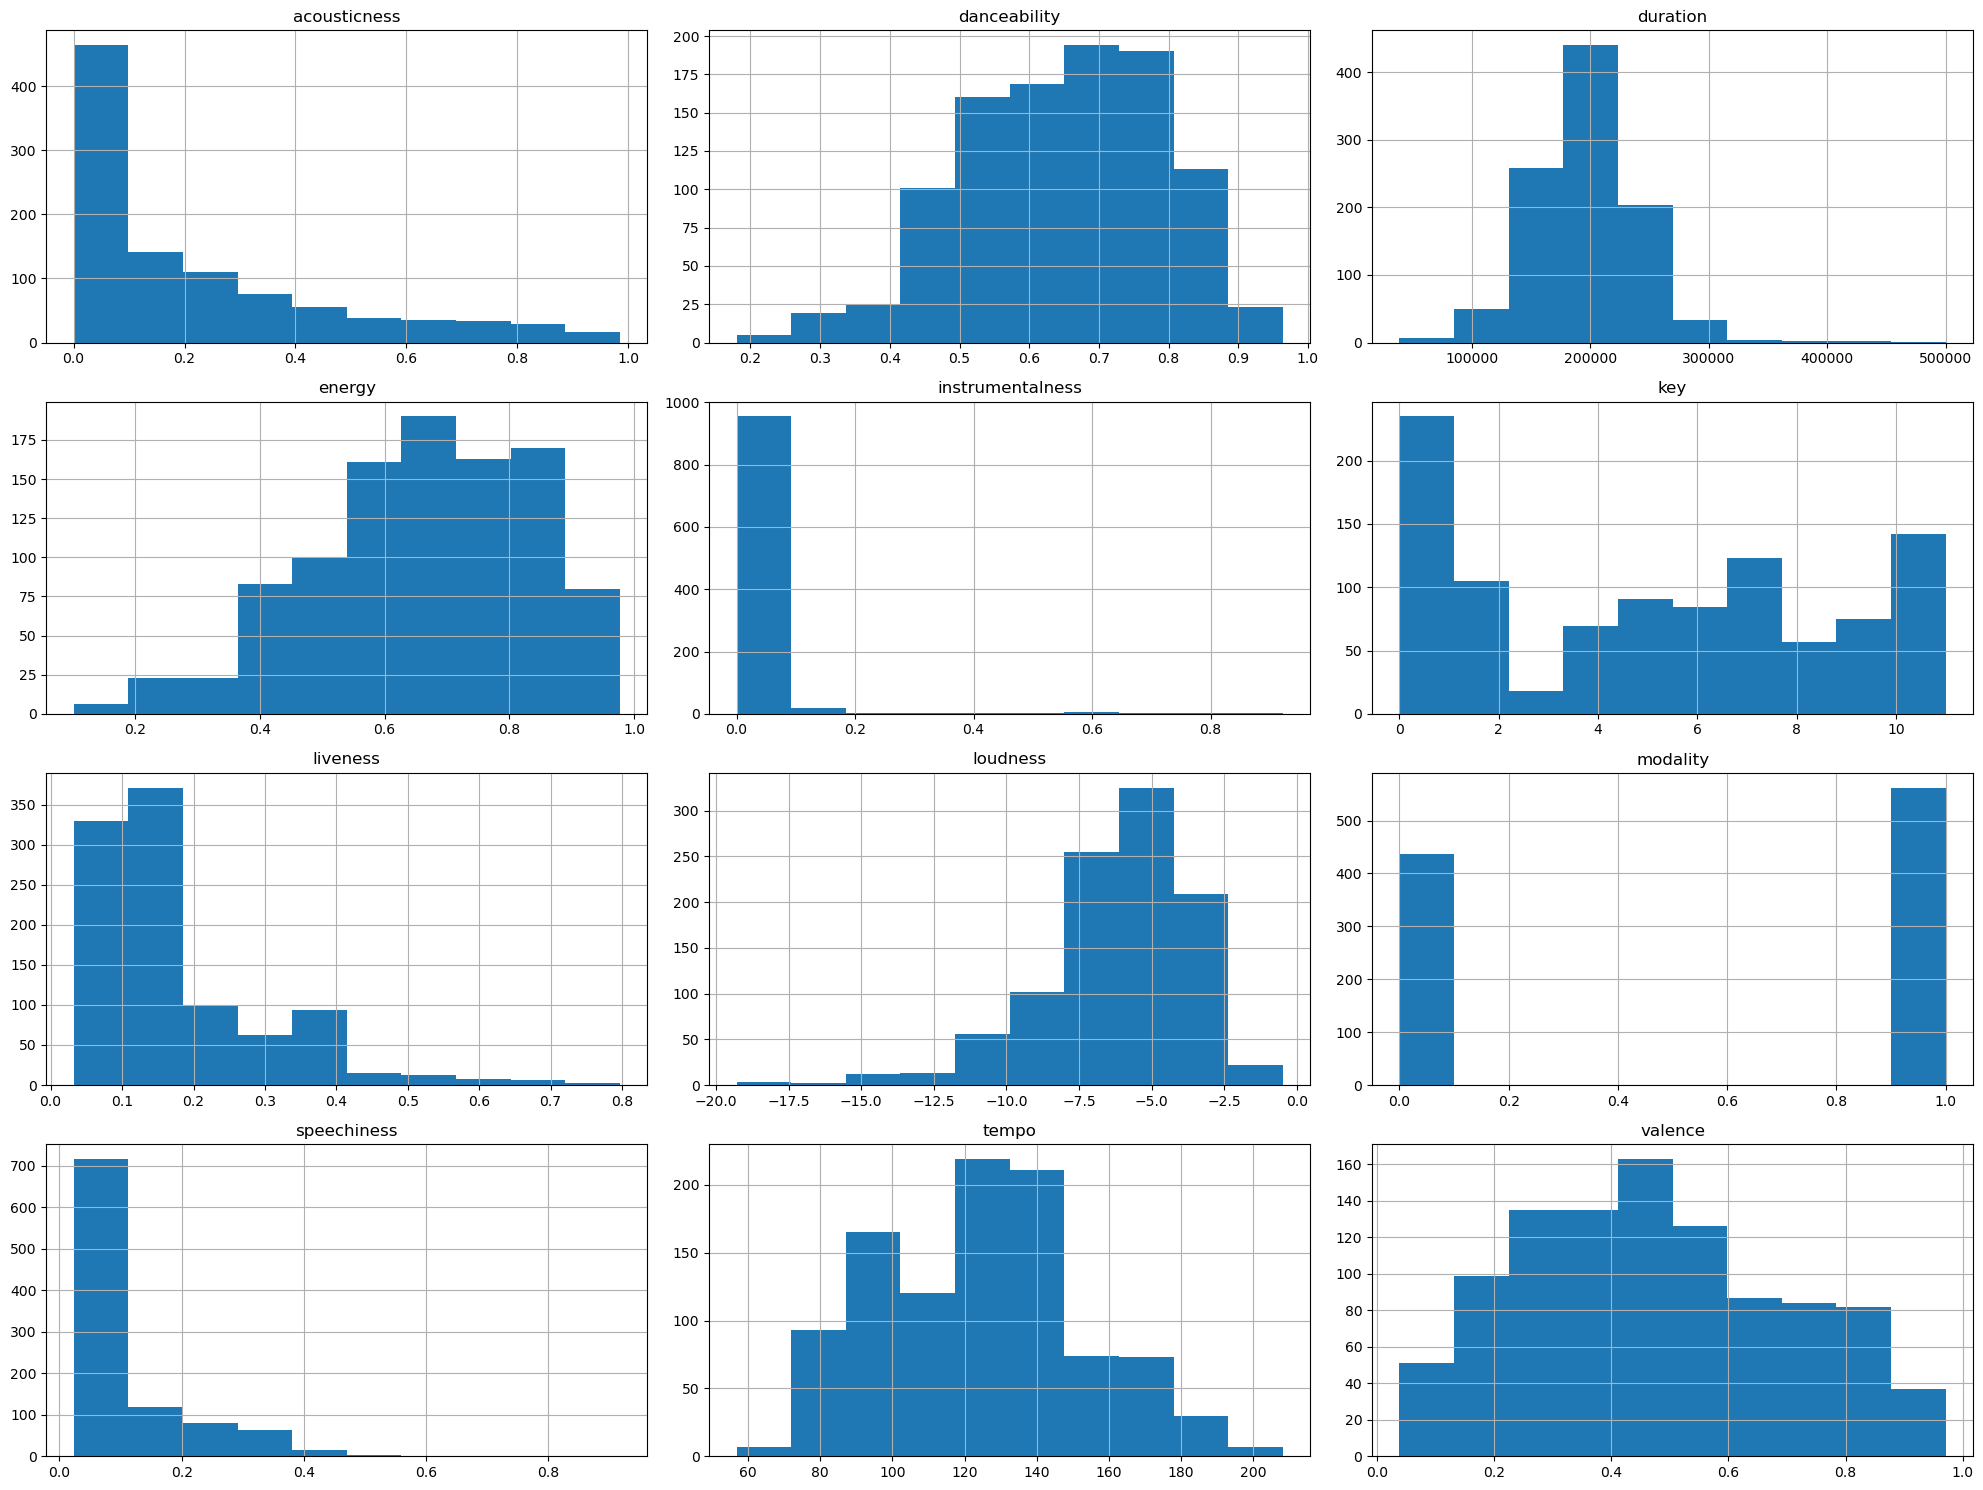

In [21]:
### AUDIO PRE-ANALYSIS
counter = 0

plt.rcParams["figure.figsize"] = [20, 15]
plt.rcParams["figure.autolayout"] = True


fig, axes = plt.subplots(4, 3)

for feature in df_audiofeat.drop('id', axis = 1):
    i = counter // 3
    j = counter % 3
    df_audiofeat.hist(feature, ax = axes[i,j])
    counter += 1

plt.show()
fig.savefig('histograms.png')

In [22]:
df_audiofeat

df_audiofeat["popularity"] = 0

for track_id in df_audiofeat.id:
    df_audiofeat.loc[df_audiofeat.id == track_id, 'popularity'] = df_track.loc[df_track['id'] == track_id, 'popularity']
    

In [23]:
print(len(df_audiofeat))
df_audiofeat.head()

999


id  acousticness  danceability  duration  energy  \
0  3dnP0JxCgygwQH9Gm7q7nb         0.483         0.668    165671   0.758   
1  6pD0ufEQq0xdHSsRbg9LBK         0.228         0.569    194563   0.724   
2  6AQbmUe0Qwf5PZnt4HmTXv         0.252         0.696    131013   0.809   
3  2UW7JaomAMuX9pZrjVpHAU         0.213         0.812    234353   0.479   
4  7FbrGaHYVDmfr7KoLIZnQ7         0.435         0.783    174253   0.592   

   instrumentalness  key  liveness  loudness  modality  speechiness    tempo  \
0          0.000019    5    0.0837    -5.176         0       0.0332  147.989   
1          0.000000    6    0.2700    -4.076         0       0.0474   83.118   
2          0.000128    5    0.2480    -8.254         1       0.0500  132.962   
3          0.000001    2    0.0756    -5.678         0       0.3330  169.922   
4          0.000004   11    0.3470    -8.332         0       0.0331  120.018   

   valence  popularity  
0    0.834        99.0  
1    0.562       100.0  
2    0.857        95.0  
3    0.559        99.0  
4    0.726        98.0

/var/folders/yg/3p9mz6dn327c9cp3ct66p4yr0000gn/T/ipykernel_91229/2163237465.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_audiofeat.corr()


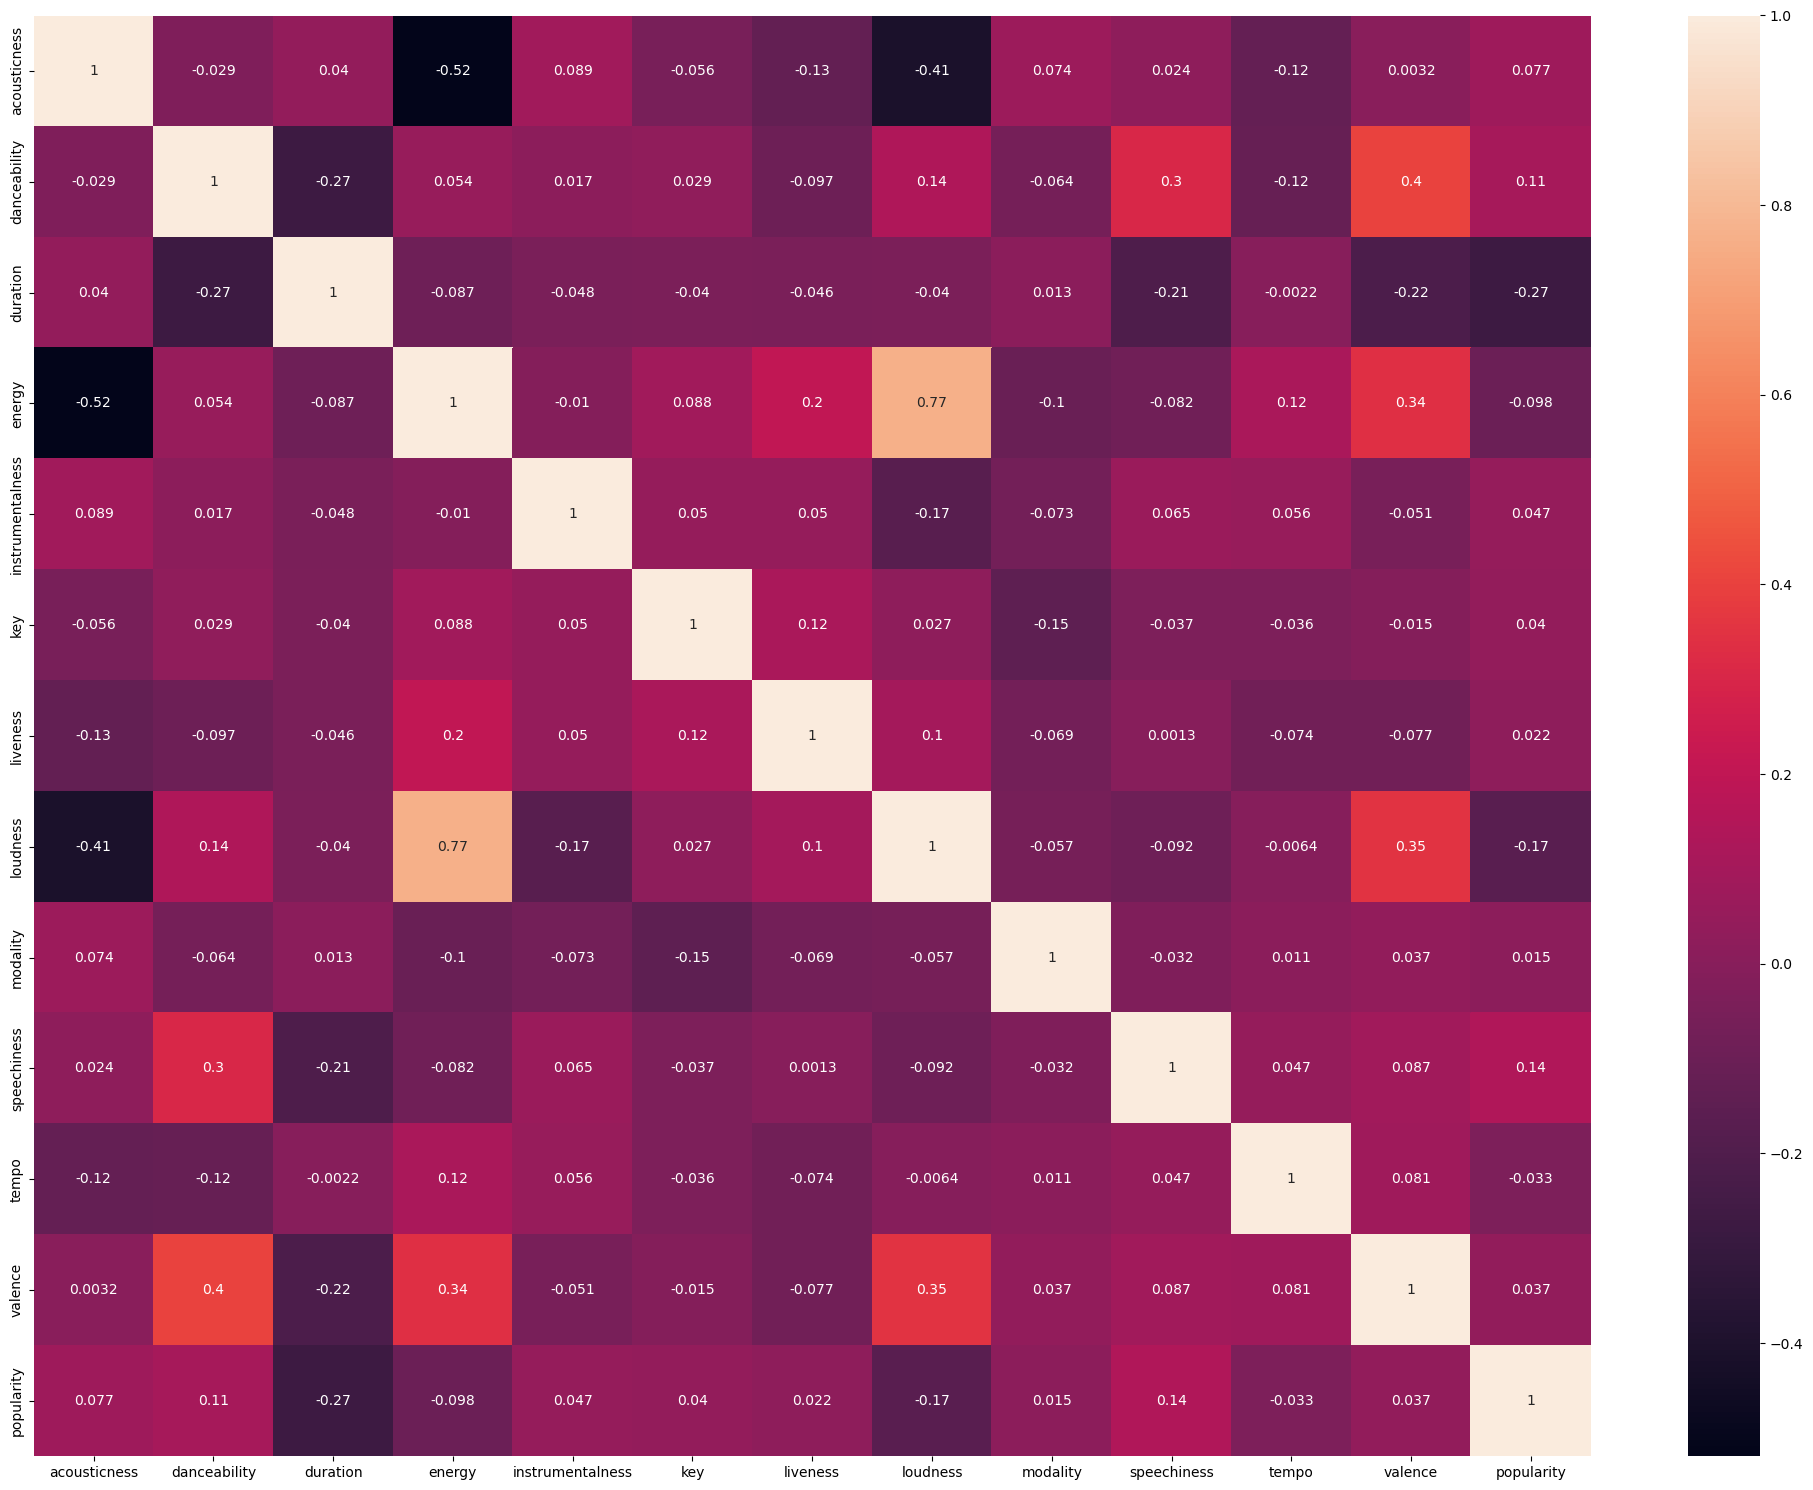

In [24]:
## CORRELATION BETWEEN FEATURES 
corr_matrix = df_audiofeat.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### PCA and K-means clustering on audio features

In [25]:
from sklearn import preprocessing as prep
from sklearn import decomposition as dec
from sklearn.cluster import KMeans
from yellowbrick import cluster as cl 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [26]:
features = df_audiofeat.drop(columns= ['id'])
features = features.dropna()
features.head()

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.483         0.668    165671   0.758          0.000019    5   
1         0.228         0.569    194563   0.724          0.000000    6   
2         0.252         0.696    131013   0.809          0.000128    5   
3         0.213         0.812    234353   0.479          0.000001    2   
4         0.435         0.783    174253   0.592          0.000004   11   

   liveness  loudness  modality  speechiness    tempo  valence  popularity  
0    0.0837    -5.176         0       0.0332  147.989    0.834        99.0  
1    0.2700    -4.076         0       0.0474   83.118    0.562       100.0  
2    0.2480    -8.254         1       0.0500  132.962    0.857        95.0  
3    0.0756    -5.678         0       0.3330  169.922    0.559        99.0  
4    0.3470    -8.332         0       0.0331  120.018    0.726        98.0

In [27]:
len(features)

842

In [28]:
### PCA

sc = prep.StandardScaler()
pca = dec.PCA()

features_std = sc.fit_transform(features)
pca.fit(features_std)

PCA()

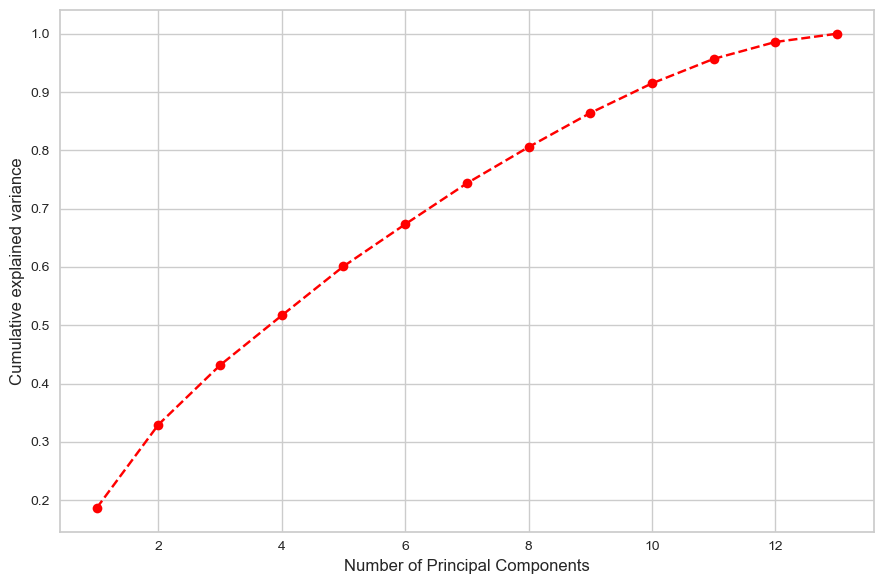

In [29]:
evr = pca.explained_variance_ratio_

fig = plt.figure(figsize=(9,6))
plt.plot(range(1, len(df_audiofeat.columns)), evr.cumsum(), marker='o', linestyle='--', color='red')
plt.xlabel('Number of Principal Components', fontsize = 12)
plt.ylabel('Cumulative explained variance', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [30]:
for n, e in enumerate(evr.cumsum()):
    if e >= 0.8:
        n_comps = n + 1
        break
print("Optimal number of components:", n_comps)
pca = dec.PCA(n_components=n_comps)
pca.fit(features_std)
sc_pca = pca.transform(features_std)

Optimal number of components: 8


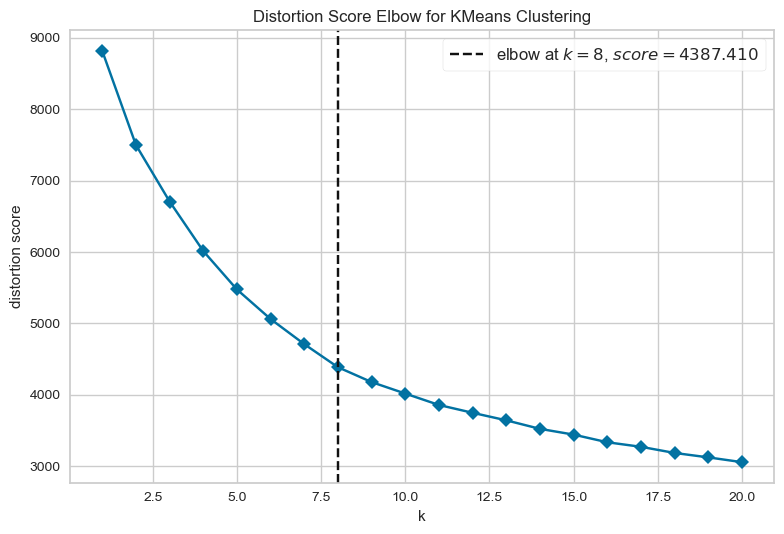

Optimal number of clusters: 8


In [31]:
### K-means clustering

visualizer = cl.KElbowVisualizer(KMeans(init='k-means++', random_state=30), k=(1,21), timings=False)
visualizer.fit(sc_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

In [32]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=30)
kmeans_pca.fit(sc_pca);

In [33]:
df_seg_pca_kmeans = pd.concat([features.reset_index(drop=True), pd.DataFrame(sc_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

acousticness  danceability  duration  energy  instrumentalness  key  \
0         0.483         0.668    165671   0.758          0.000019    5   
1         0.228         0.569    194563   0.724          0.000000    6   
2         0.252         0.696    131013   0.809          0.000128    5   
3         0.213         0.812    234353   0.479          0.000001    2   
4         0.435         0.783    174253   0.592          0.000004   11   

   liveness  loudness  modality  speechiness  ...  popularity  Component 1  \
0    0.0837    -5.176         0       0.0332  ...        99.0    -0.809591   
1    0.2700    -4.076         0       0.0474  ...       100.0    -0.695309   
2    0.2480    -8.254         1       0.0500  ...        95.0    -0.833890   
3    0.0756    -5.678         0       0.3330  ...        99.0     0.172079   
4    0.3470    -8.332         0       0.0331  ...        98.0     0.059895   

   Component 2  Component 3  Component 4  Component 5  Component 6  \
0     1.134883    -0.333568     0.357963     0.753972    -0.073533   
1     0.002138     1.132649    -1.463479    -0.508132    -0.049757   
2     1.392385    -0.346592     0.038587    -1.299355     0.710483   
3     1.903468    -0.441566     1.893943     0.797006    -1.442806   
4     1.457311     1.795654    -1.115569     0.045606    -0.227267   

   Component 7  Component 8  Cluster  
0    -1.723545     0.414655        0  
1    -0.527557    -0.454782        0  
2    -1.243935     0.717557        0  
3     0.849719    -0.038213        1  
4    -1.139861     1.507963        0  

[5 rows x 22 columns]

In [34]:
import random

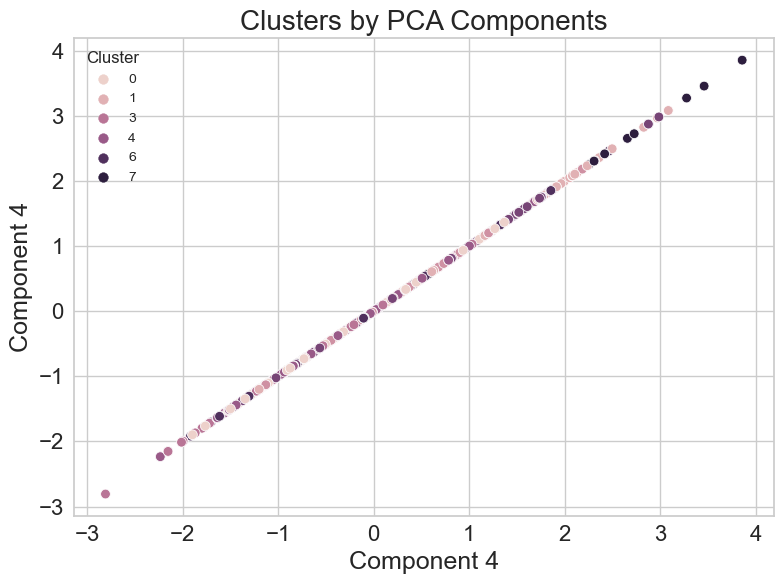

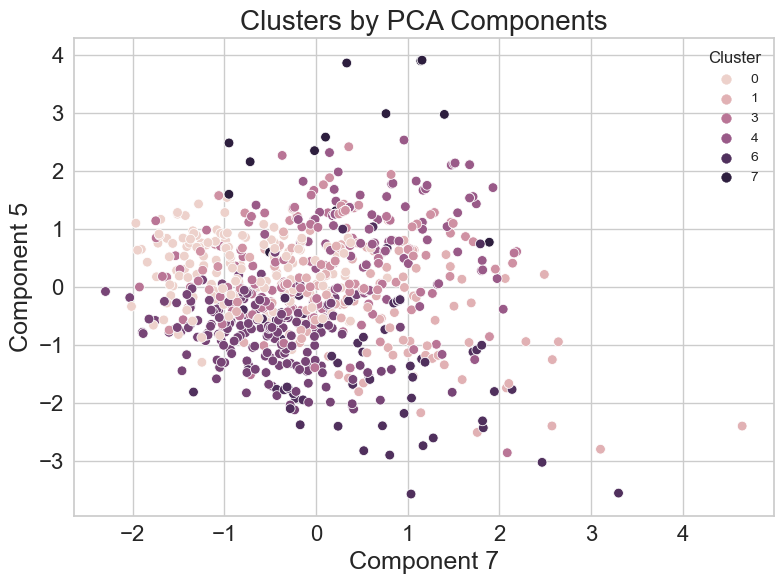

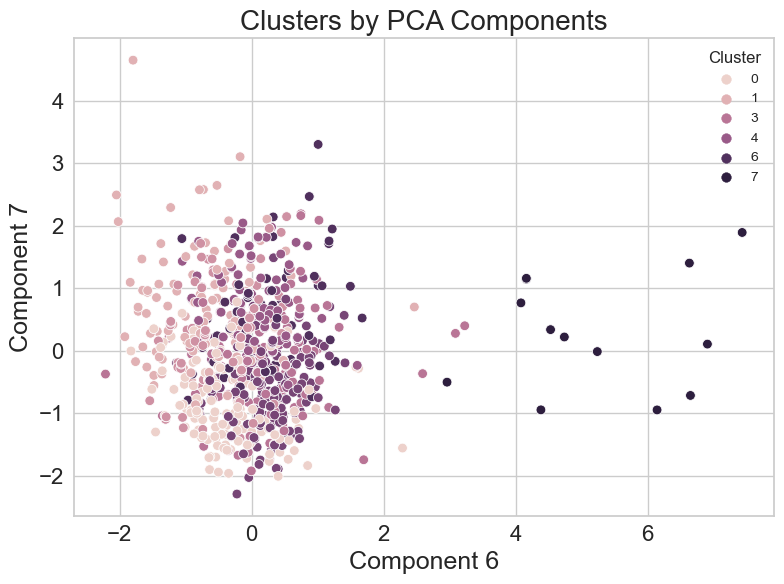

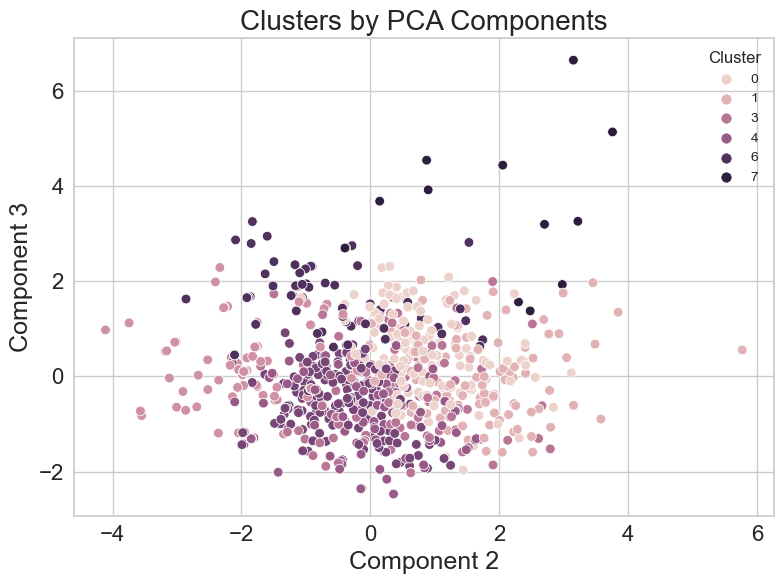

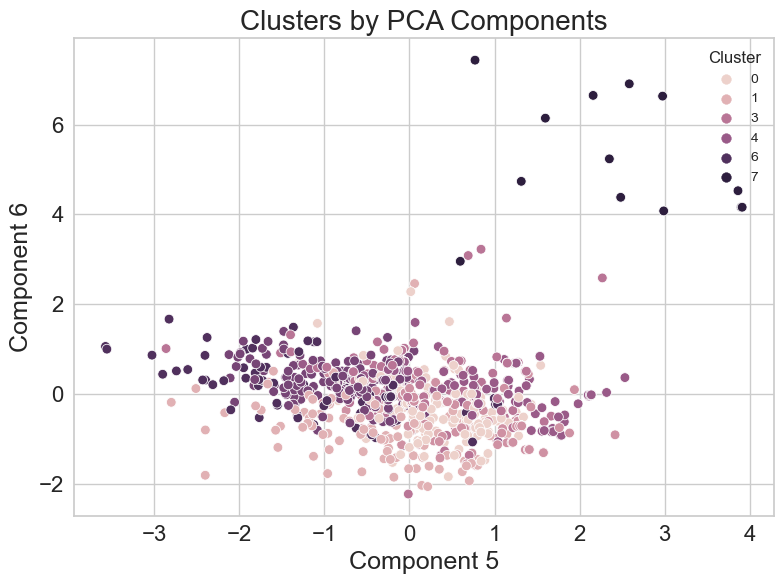

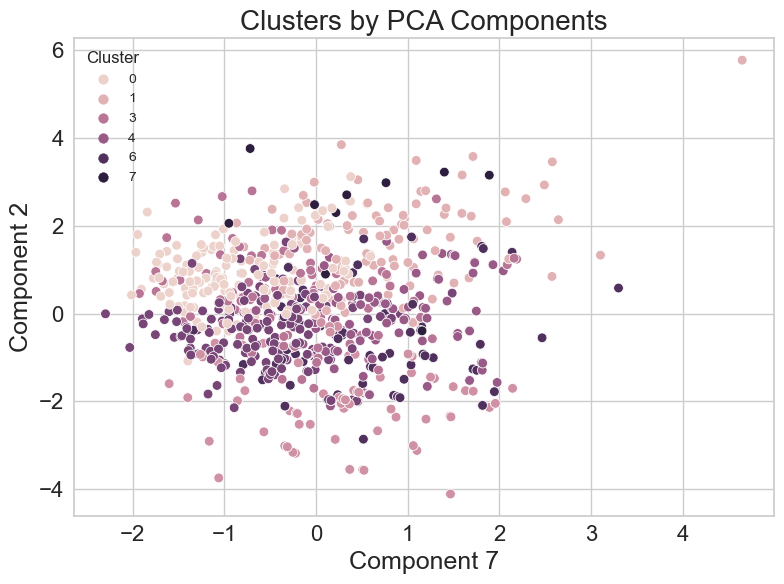

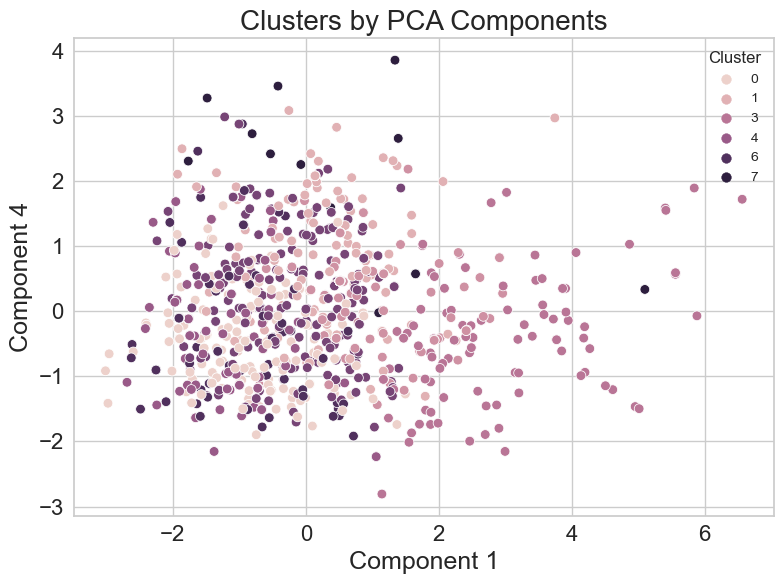

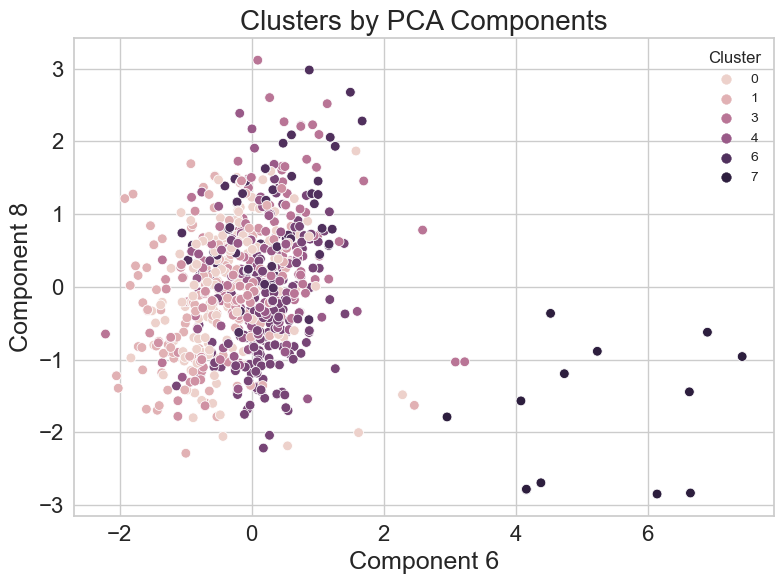

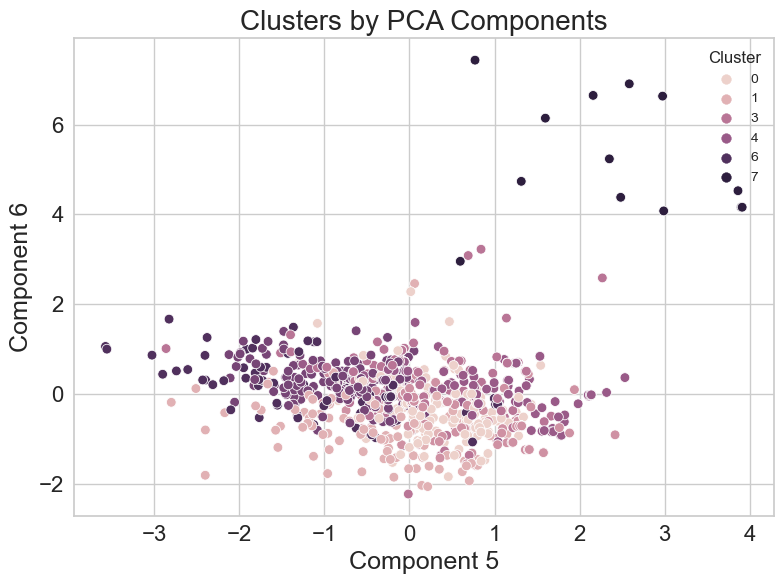

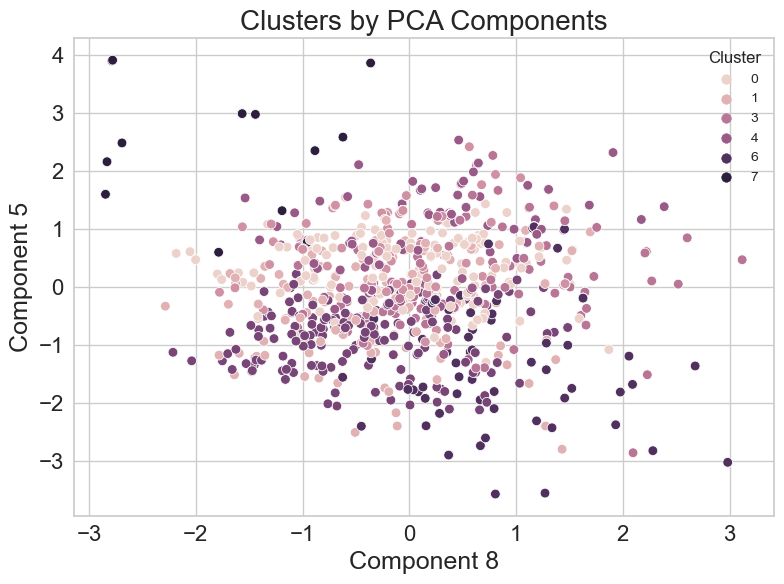

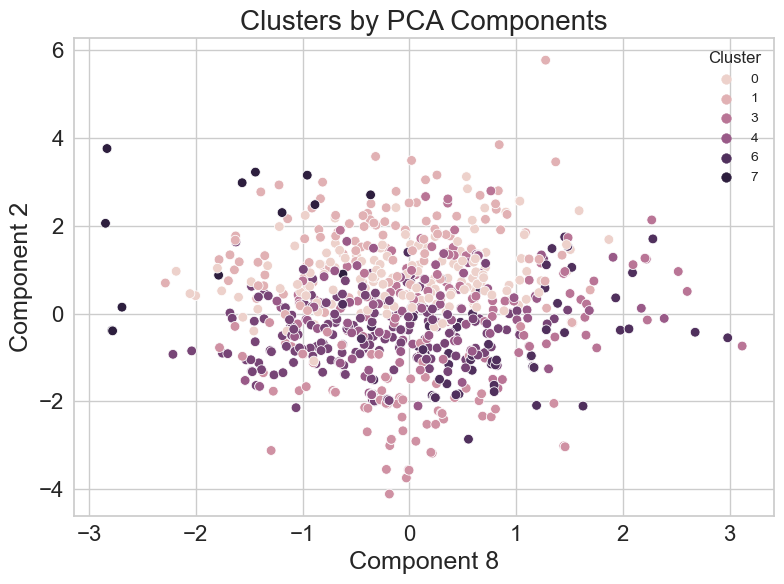

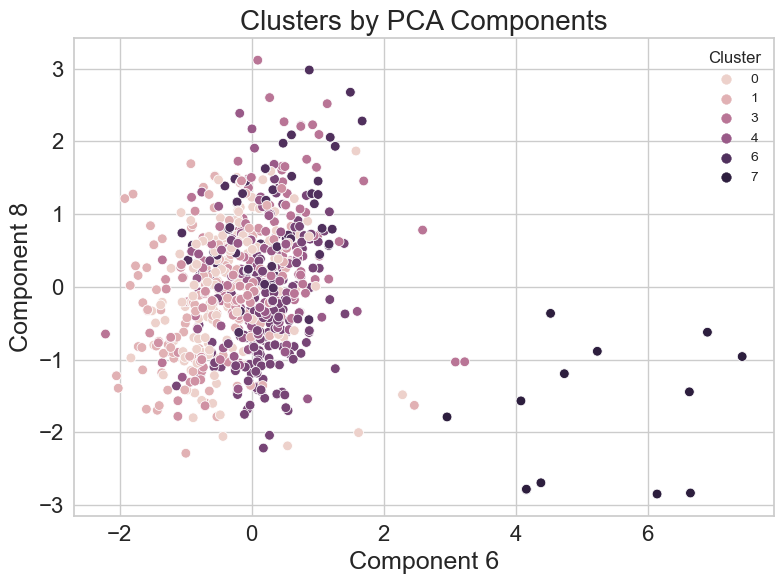

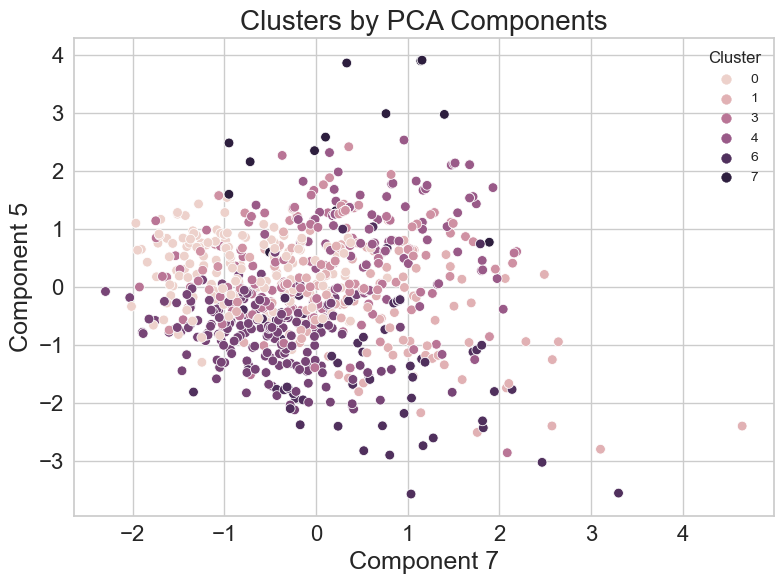

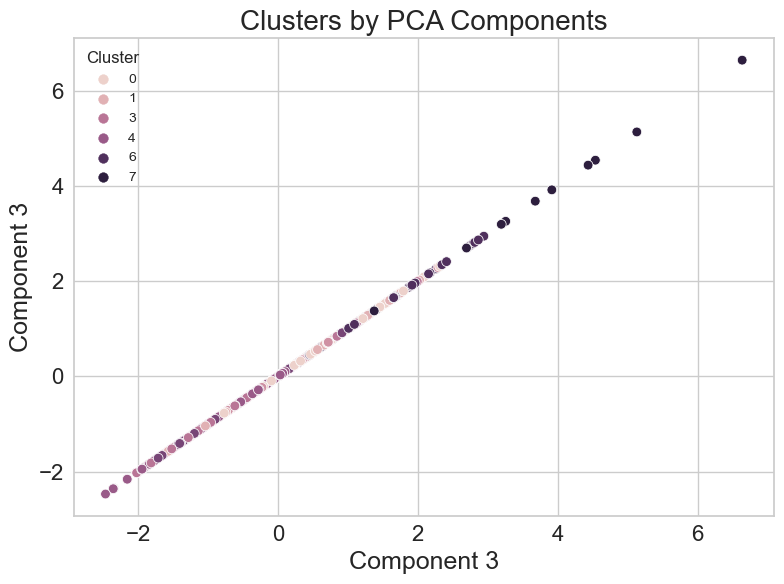

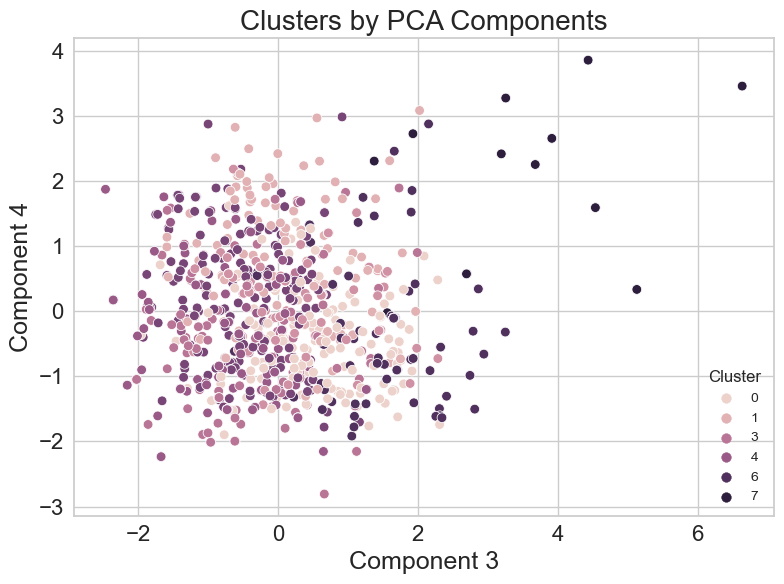

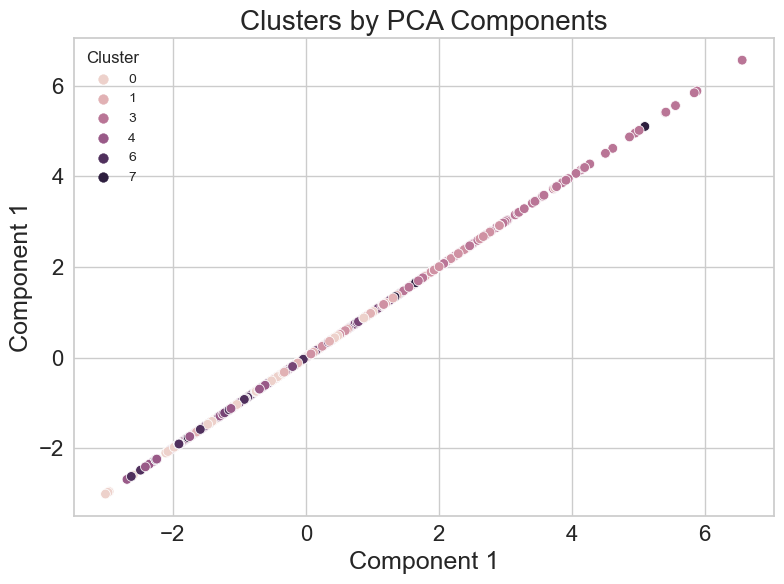

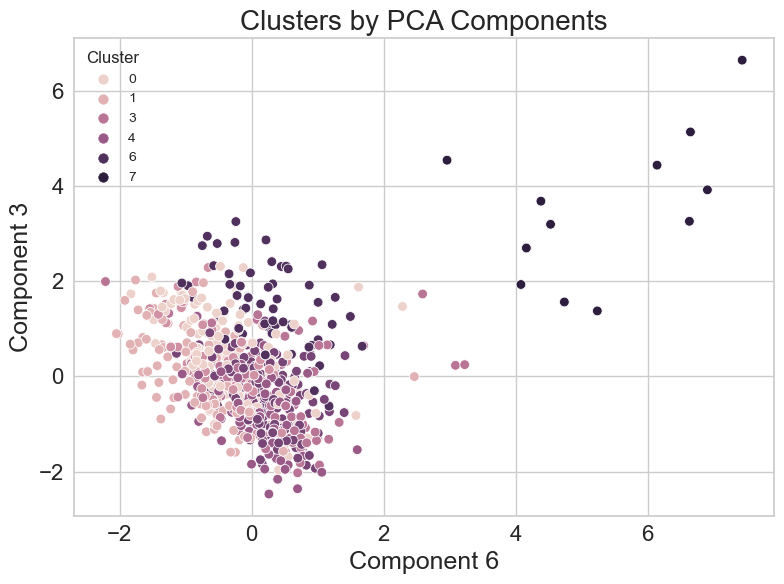

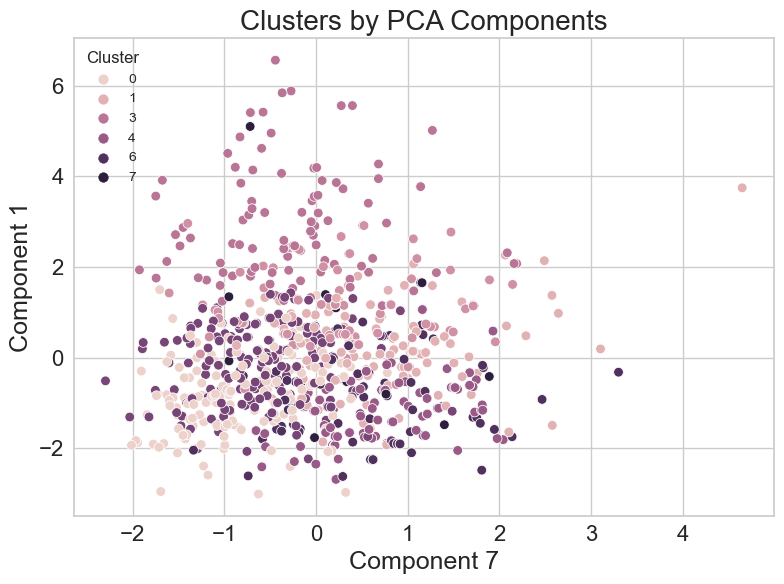

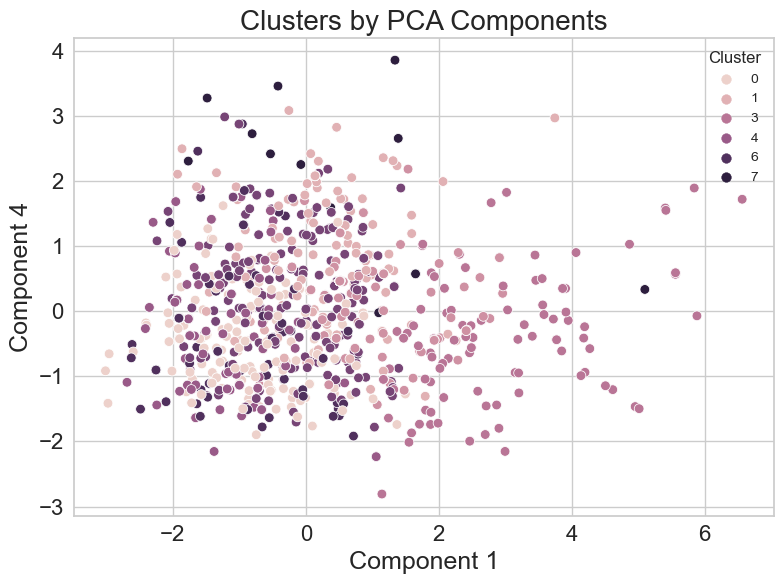

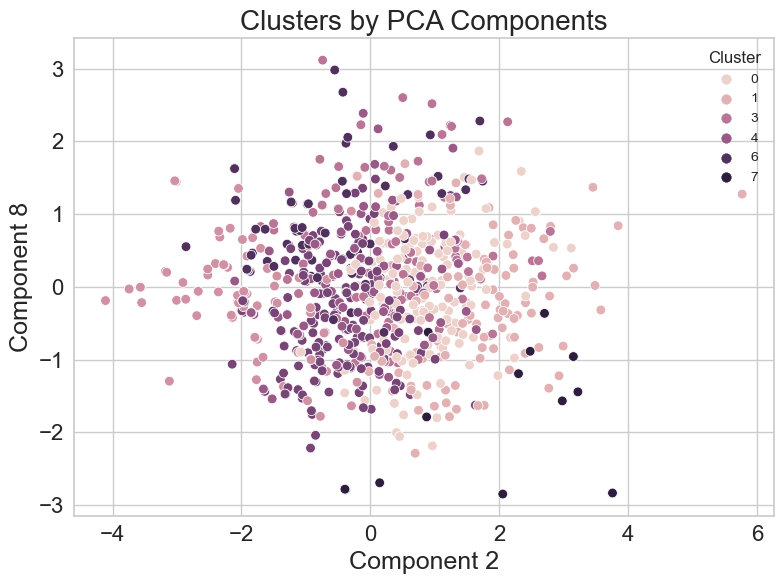

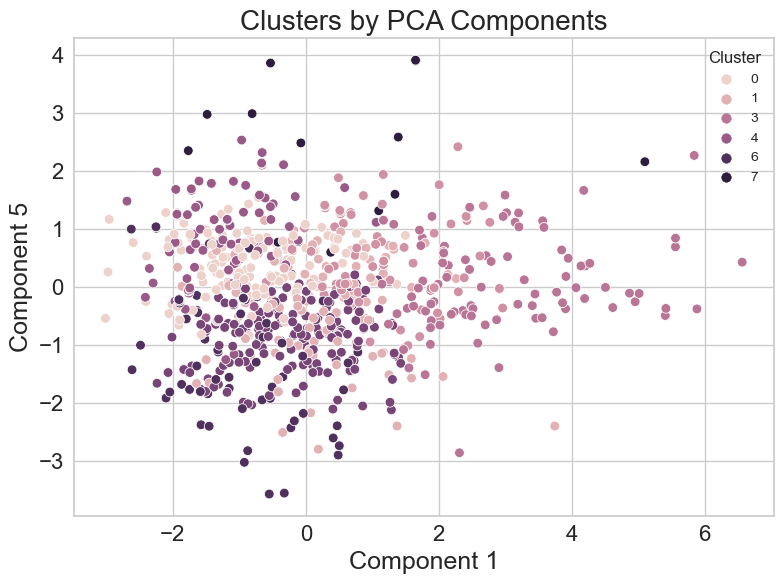

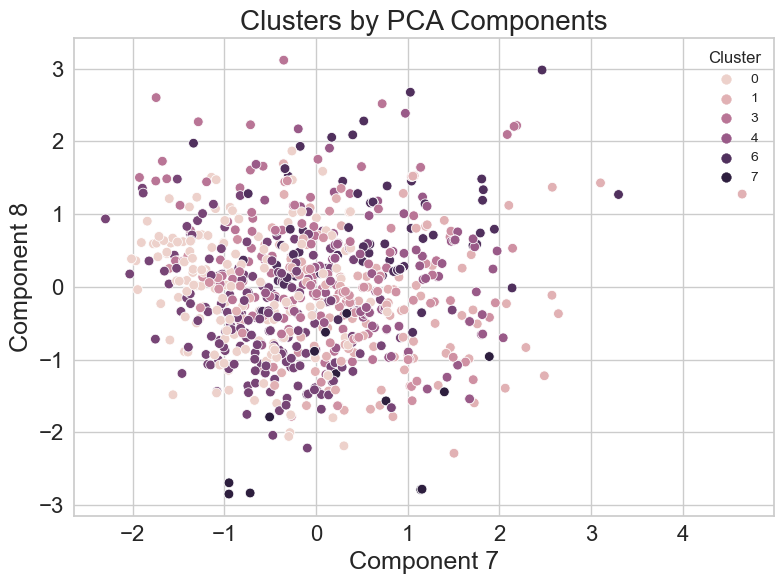

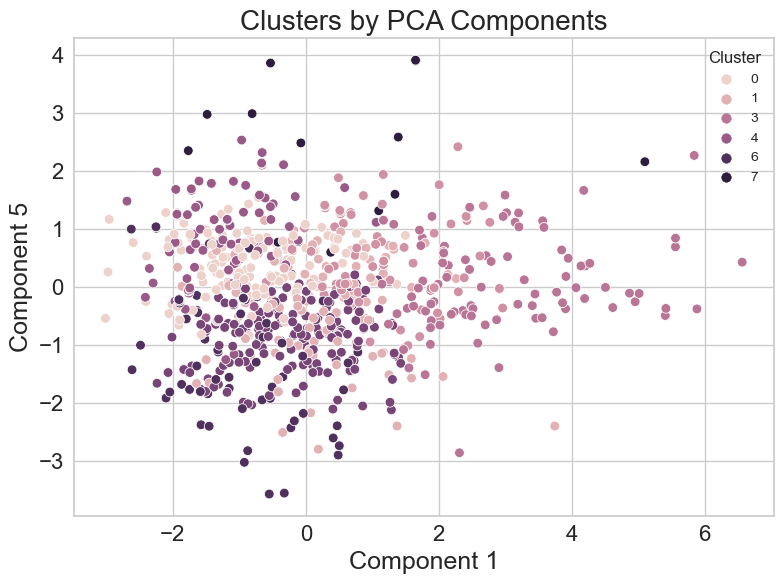

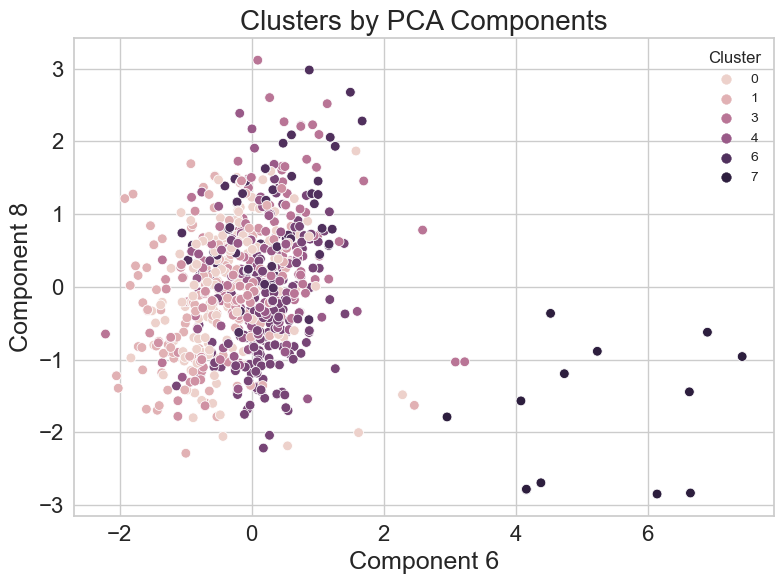

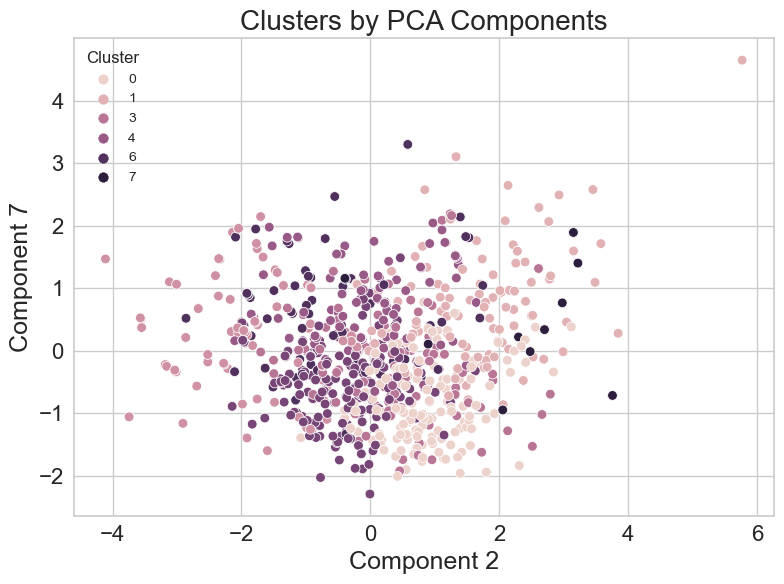

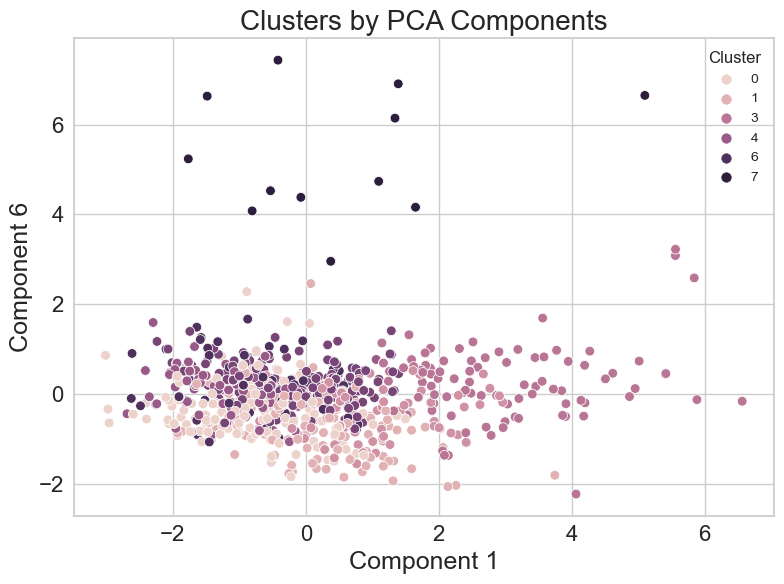

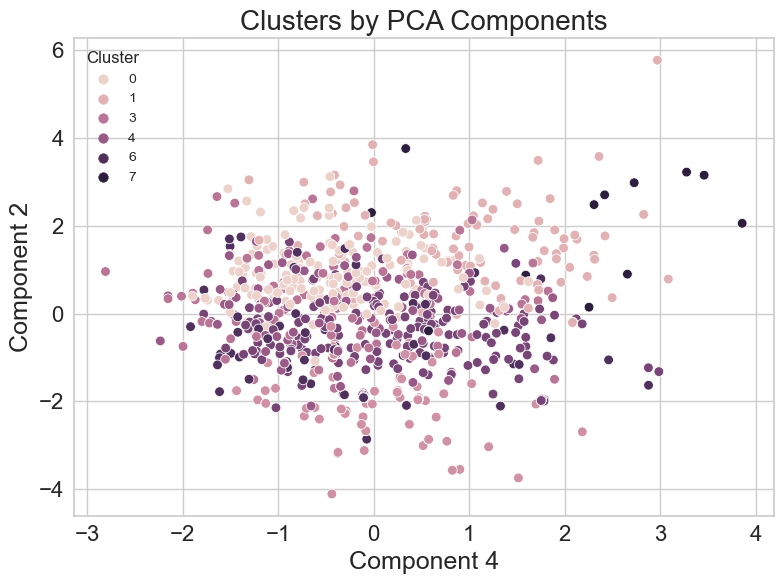

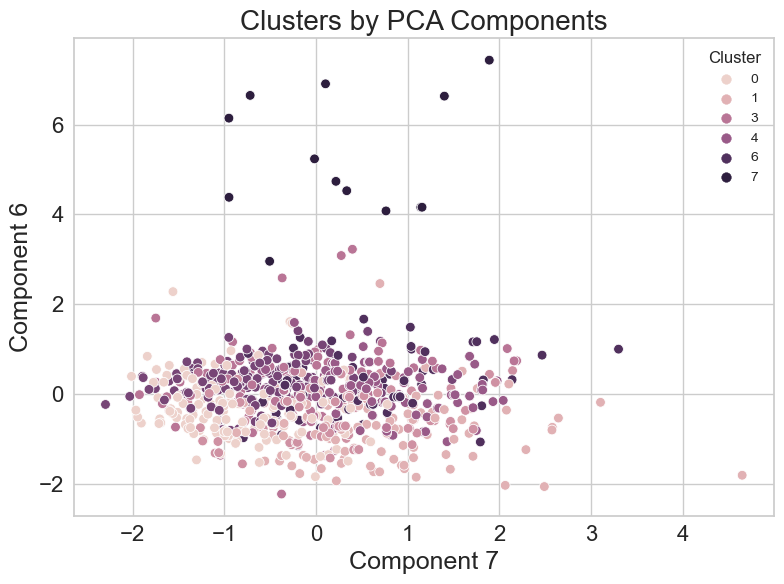

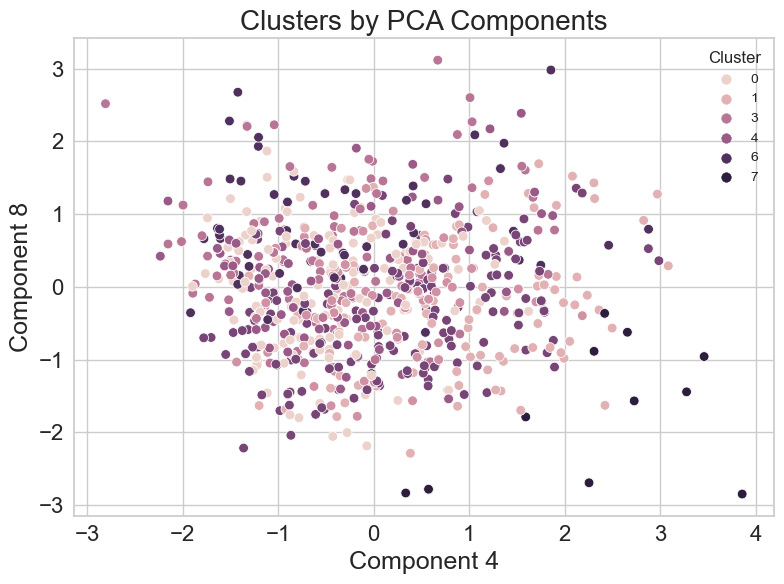

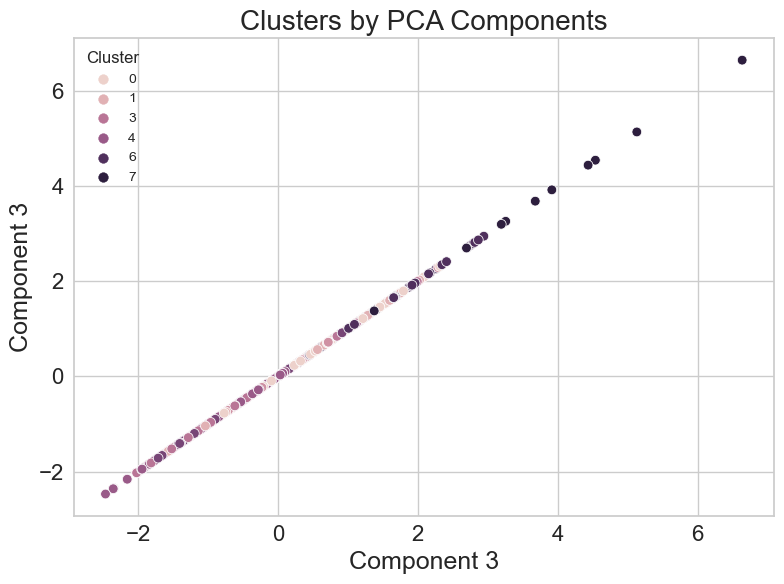

In [36]:
pc1 = df_seg_pca_kmeans['Component 1']
pc2 = df_seg_pca_kmeans['Component 2']
pc3 = df_seg_pca_kmeans['Component 3']
pc4 = df_seg_pca_kmeans['Component 4']
pc5 = df_seg_pca_kmeans['Component 5']
pc6 = df_seg_pca_kmeans['Component 6']
pc7 = df_seg_pca_kmeans['Component 7']
pc8 = df_seg_pca_kmeans['Component 8']


PCs = (pc1, pc2, pc3, pc4, pc5, pc6, pc7, pc8)

column_headers = list(df_seg_pca_kmeans.columns)
column_headers = column_headers[-9:len(column_headers)-1]

for i in range(30):
    xi = random.choice(range(len(column_headers)))
    yi = random.choice(range(len(column_headers)))
    xa = PCs[xi]
    ya = PCs[yi]
    fig = plt.figure(figsize=(8, 6))
    sns.scatterplot(x = xa, y = ya, hue=df_seg_pca_kmeans['Cluster'])
    plt.title('Clusters by PCA Components', fontsize=20)
    plt.xlabel(str(column_headers[xi]), fontsize=18)
    plt.ylabel(str(column_headers[yi]), fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    if (i % 4 == 0):
        fig.savefig(str(column_headers[xi]) + str(column_headers[xi]) + '.png')


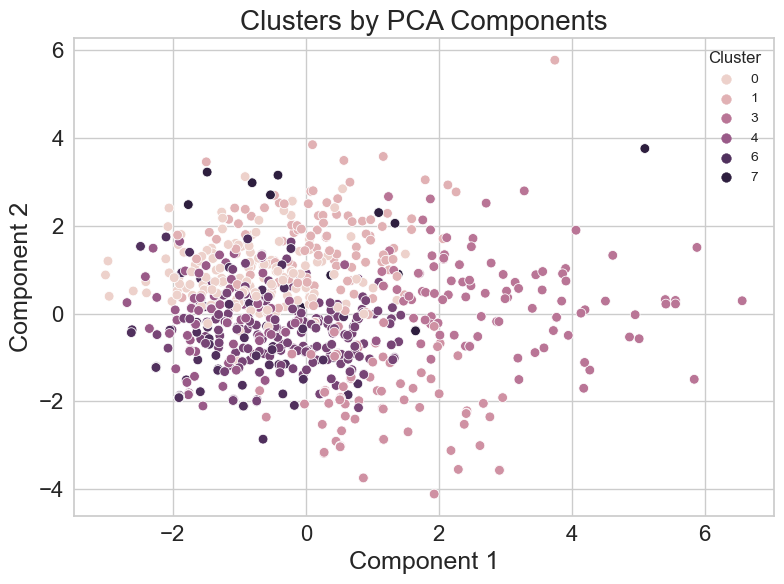

In [37]:
xa = pc1
ya = pc2
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = xa, y = ya, hue=df_seg_pca_kmeans['Cluster'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()